# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df =pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice=merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice_ID = duplicate_mice['Mouse ID'].unique()
duplicated_mice_ID

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice=merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[~merge_df['Mouse ID'].isin(duplicated_mice_ID)]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [192]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume= clean_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = tumor_volume['Tumor Volume (mm3)'].mean()
tumor_volume_median = tumor_volume['Tumor Volume (mm3)'].median()
tumor_volume_var= tumor_volume['Tumor Volume (mm3)'].var()
tumor_volume_std= tumor_volume['Tumor Volume (mm3)'].std()
tumor_volume_sem = tumor_volume['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,
                "Median Tumor Volume":tumor_volume_median,
                "Tumor Volume Variance":tumor_volume_var,
                "Tumor Volume Std. Dev.":tumor_volume_std,
               "Tumor Volume Std. Err.":tumor_volume_sem,
              })
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM='sem'
)
summary_statistics 

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

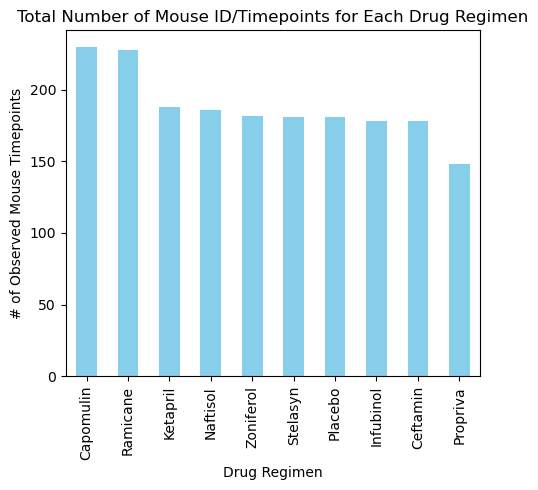

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind='bar', figsize=(5, 5), color='skyblue', title='Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

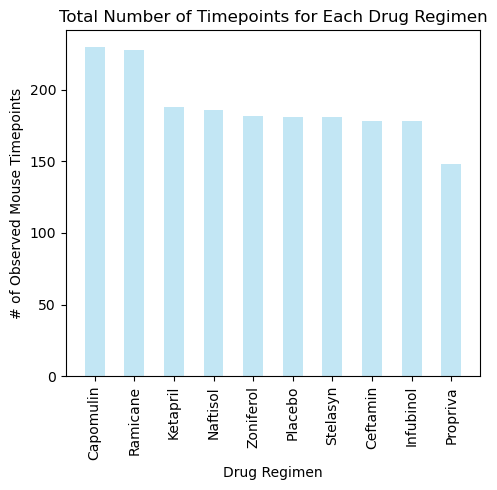

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts2 = clean_df.groupby('Drug Regimen').size().sort_values(ascending=False)
x_axis = np.arange(len(drug_regimen_counts2))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(5,5))
plt.bar(x_axis, drug_regimen_counts2, color='skyblue', alpha=0.5,width=0.5, align="center")  
plt.xticks(tick_locations, drug_regimen_counts2.index, rotation="vertical")  
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()  
plt.show()

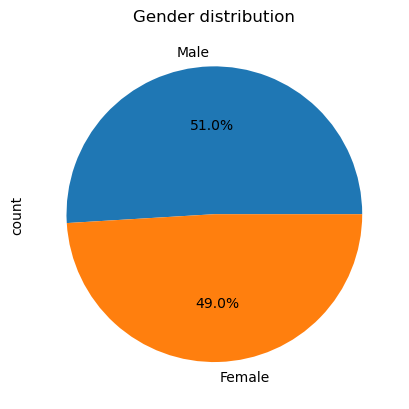

In [96]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

pie_mice=clean_df["Sex"].value_counts()
pie_mice.plot(kind="pie", title="Gender distribution",autopct='%1.1f%%')
plt.show()




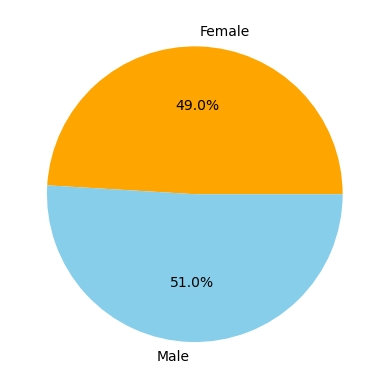

In [103]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
labels=clean_df["Sex"].unique()
sizes=clean_df["Sex"].value_counts().sort_values(ascending=True)
colors=["orange","skyblue"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

clean_df1=clean_df.set_index("Drug Regimen")
df=clean_df1.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],:].sort_values("Mouse ID")

# Start by getting the last (greatest) timepoint for each mouse
df=df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_merge_df=pd.merge(clean_df,df,on=("Mouse ID","Timepoint"),how="right")

final_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
5,a520,45,38.810366,1,Ramicane,Male,13,21
6,a577,30,57.031862,2,Infubinol,Female,6,25
7,a644,45,32.978522,1,Ramicane,Female,7,17
8,a685,45,66.083066,3,Infubinol,Male,8,30
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [149]:
# Put treatments into a list for for loop (and later for plot labels)
analysis_regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
capomulin=[]
ramicane=[]
infubinol=[]
ceftamin=[]

for index, row in final_merge_df.iterrows():
        if row["Drug Regimen"] == analysis_regimens[0]:
            capomulin.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == analysis_regimens[1]:
            ramicane.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == analysis_regimens[2]:
            infubinol.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == analysis_regimens[3]:
            ceftamin.append(row["Tumor Volume (mm3)"])
                       
tumor_vol_list=pd.DataFrame({
    "capomulin":capomulin,
    "ramicane":ramicane,
    "infubinol":infubinol,
    "ceftamin":ceftamin})

In [162]:
# Put treatments into a list for for loop (and later for plot labels)
analysis_regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Calculate the IQR and quantitatively determine if there are any potential outliers.
#create the subset:
final_tumor_vol_list =[]
    
for drug in analysis_regimens:
    # Create an empty list for final tumor volumes for each drug
    final_tumor_vol_list = clean_df.loc[clean_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Calculate quartiles and IQR
    quartiles = final_tumor_vol_list.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print("Regimen:", drug)
    print("Lower quartile for", drug, "is:", lowerq)
    print("Upper quartile for", drug, "is:", upperq)
    print("Interquartile range for", drug, "is:", iqr)
    print("Values below", lower_bound, "could be outliers.")
    print("Values above", upper_bound, "could be outliers.")
    print("")
   
    


 


Regimen: Capomulin
Lower quartile for Capomulin is: 37.685932865
Upper quartile for Capomulin is: 45.0
Interquartile range for Capomulin is: 7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.

Regimen: Ramicane
Lower quartile for Ramicane is: 36.674634585
Upper quartile for Ramicane is: 45.0
Interquartile range for Ramicane is: 8.325365415
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.

Regimen: Infubinol
Lower quartile for Infubinol is: 47.3123533
Upper quartile for Infubinol is: 57.314443967500004
Interquartile range for Infubinol is: 10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.

Regimen: Ceftamin
Lower quartile for Ceftamin is: 47.2084271125
Upper quartile for Ceftamin is: 56.801437570000004
Interquartile range for Ceftamin is: 9.593010457500007
Values below 32.81891142624998 could be outliers.
Va

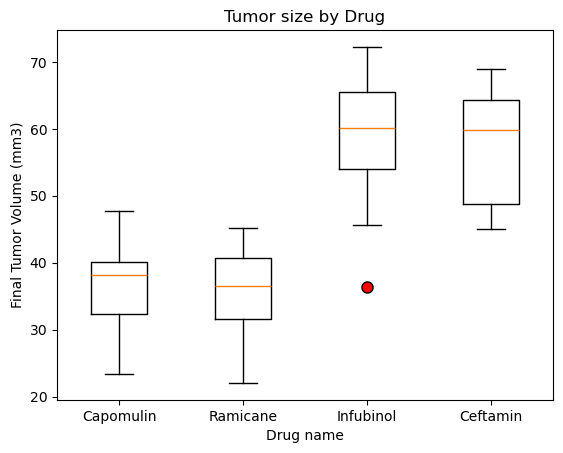

In [184]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
box = [tumor_vol_list["capomulin"],tumor_vol_list["ramicane"],tumor_vol_list["infubinol"],tumor_vol_list["ceftamin"]]

fig, ax = plt.subplots()
ax.boxplot(box, labels = analysis_regimens,flierprops={'markerfacecolor':'r','markersize': 8})
ax.set_title('Tumor Volume by Drug') 
ax.set_xlabel('Drug Name') 
ax.set_ylabel('Final Tumor Volume (mm3)') 
plt.show()

## Line and Scatter Plots

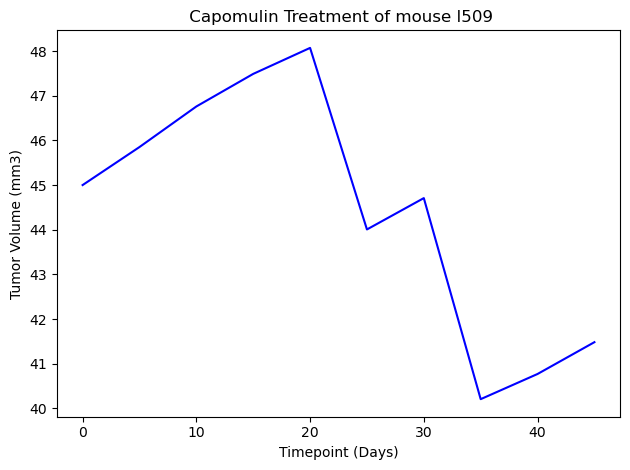

In [176]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_df=clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
mouse_ID='l509'
mouse_df = capo_df.loc[capo_df['Mouse ID'] == mouse_ID]

# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], color='b')

# Set x/y label, title
plt.title(f" Capomulin Treatment of mouse {mouse_ID}")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.tight_layout()

# Present the box plot chart
plt.show()



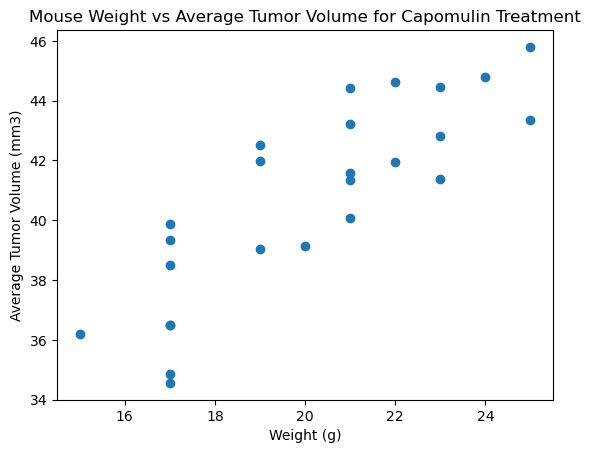

In [180]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume_cap = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight_mouse = capo_df.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.scatter(avg_weight_mouse, avg_tumor_volume_cap)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment')
plt.show()

# Present the box plot chart
plt.show()


## Correlation and Regression

The correlation between mmouse weight and the average tumor volume is 0.84


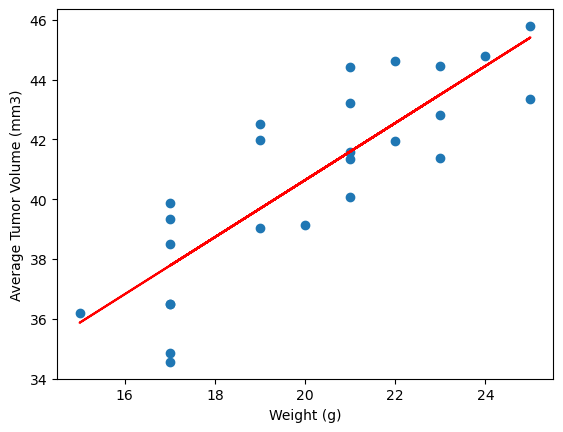

In [185]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_weight_mouse,avg_tumor_volume_cap)
print(f"The correlation between mmouse weight and the average tumor volume is {round(correlation[0],2)}")

slope,intercept,rvalue,pvalue,stderr=st.linregress(avg_weight_mouse,avg_tumor_volume_cap)

regress=avg_weight_mouse*slope+intercept


plt.scatter (avg_weight_mouse,avg_tumor_volume_cap)
plt.plot(avg_weight_mouse,regress, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
